# Численное моделирование распространения сейсмических волн в двумерной среде MILEN SEM 2D


## Итоговые характеристики геометрии модели

- Сетка криволинейная, адаптированная под свойства слоев, четырехугольная
- Элементов по вертикали: 85
- Элементов по горизонтали: 235
- Размер элемента: 50x[от 10 до 50] м. 
- Элементов: 19975 = 235 x 85
- Узлов: 20296
- Общая толщина объединенных слоев: ~2370.6 м
- Ширина 235*50 = 11750 м
- Координата первой скважины по X на модели: 4250 м
- Координата второй скважины по X на модели: 7500 м
- Расстояние между скважинами: 3250 м


### Сетка
![Визуализация модели model1_mesh](img/model1_50a4p_mesh.png)

## Визуальное сравнение исходной плотности и плотности на модели

Нам известны изначальные плотности в районе скважин. Визуально оценим, насколько они различаются:

In [7]:
import numpy as np
# Парсинг данных скважин
def parse_well_data(filepath):
    """
    Парсит файл с данными скважины и возвращает исправленные данные
    Используем ручной парсинг, так как pandas пропускает одну строку.
    """
    # Ручной парсинг файла для получения всех строк
    with open(filepath, 'r') as f:
        lines = f.readlines()[1:]  # пропускаем заголовок
    
    data = []
    for line in lines:
        parts = line.split()
        if len(parts) >= 4:  # проверяем, что есть все 4 значения
            data.append([float(parts[1]), float(parts[2]), float(parts[3])])  # Vp, rhob, Vs
    
    data_array = np.array(data)
    num_points = len(data_array)
    
    # Создаем правильные глубины - шаг 10 м начиная с 10 м для всех точек
    corrected_depths = np.arange(10, 10 + num_points * 10, 10)
    
    # Извлекаем параметры
    vp = data_array[:, 0]    # Vp - скорость продольной волны
    rhob = data_array[:, 1]  # Плотность
    vs = data_array[:, 2]    # Vs - скорость поперечной волны
    
    return corrected_depths, vp, rhob, vs

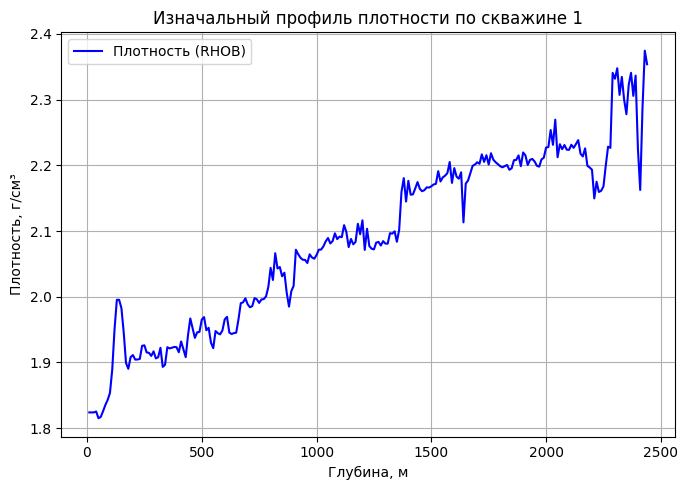

In [8]:
well1_depth, well1_vp, well1_rhob, well1_vs = parse_well_data('src/well1_Backus_Elast_Vp_Vs_rhob.txt')
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
plt.plot(well1_depth, well1_rhob, label='Плотность (RHOB)', color='b')
plt.xlabel('Глубина, м')
plt.ylabel('Плотность, г/см³')
plt.title('Изначальный профиль плотности по скважине 1')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


### Колебания плотности в model1 на вертикальной линии 4250:
![Визуализация модели model1_50a4p_density_well1](img/model1_50a4p_density_well1.png)

Видно, что график значительно сглажен. Аналогичные графики для менее сглаженных версий модели можно посмотреть в part3.

# Колебания модуля Юнга и коэфф. Пуассона для первой скважины:
![Визуализация модели model1_50a4p_poison_well1](img/model1_50a4p_poison_well1.png)
![Визуализация модели model1_50a4p_young_well1](img/model1_50a4p_young_well1.png)

### Коэффициент Пуассона
![Визуализация модели model1_poison](img/model1_50a4p_poison.png)

### Модуль Юнга
![Визуализация модели model1_young](img/model1_50a4p_young.png)

### Плотность
![Визуализация модели model1_density](img/model1_50a4p_density.png)